Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# R Notebook

``` r
#                   Trend Line Estimation notebook - 1 - Linear Trend
```

problem: Uisng the ‘austres’ (quarterly ts data) data (from datasets
library) of R, conduct the following tasks - Remember - The data starts
from 1st quarter of 1975 and ends in 4th quarter of 1985 \* Fit a linear
trend to the data. \* Project values corresponding to year 1986 \* Plot
fitted values with Actual Values

``` r
# Install and Load required packages
install.packages('tidyverse')
library(tidyverse)
library(datasets)
```

``` r
# Consider the 'austres' data set
data('austres')
data.aus = austres
data.aus
```

            Qtr1    Qtr2    Qtr3    Qtr4
    1971         13067.3 13130.5 13198.4
    1972 13254.2 13303.7 13353.9 13409.3
    1973 13459.2 13504.5 13552.6 13614.3
    1974 13669.5 13722.6 13772.1 13832.0
    1975 13862.6 13893.0 13926.8 13968.9
    1976 14004.7 14033.1 14066.0 14110.1
    1977 14155.6 14192.2 14231.7 14281.5
    1978 14330.3 14359.3 14396.6 14430.8
    1979 14478.4 14515.7 14554.9 14602.5
    1980 14646.4 14695.4 14746.6 14807.4
    1981 14874.4 14923.3 14988.7 15054.1
    1982 15121.7 15184.2 15239.3 15288.9
    1983 15346.2 15393.5 15439.0 15483.5
    1984 15531.5 15579.4 15628.5 15677.3
    1985 15736.7 15788.3 15839.7 15900.6
    1986 15961.5 16018.3 16076.9 16139.0
    1987 16203.0 16263.3 16327.9 16398.9
    1988 16478.3 16538.2 16621.6 16697.0
    1989 16777.2 16833.1 16891.6 16956.8
    1990 17026.3 17085.4 17106.9 17169.4
    1991 17239.4 17292.0 17354.2 17414.2
    1992 17447.3 17482.6 17526.0 17568.7
    1993 17627.1 17661.5                

``` r
# Checking the type of the data
class(data.aus)
```

    [1] "ts"

``` r
# Extracting No. residents from 1975 to 1985
yt = ts(data.aus, frequency = 4, start = c(1975,1), end = c(1985,4))
yt
```

            Qtr1    Qtr2    Qtr3    Qtr4
    1975 13067.3 13130.5 13198.4 13254.2
    1976 13303.7 13353.9 13409.3 13459.2
    1977 13504.5 13552.6 13614.3 13669.5
    1978 13722.6 13772.1 13832.0 13862.6
    1979 13893.0 13926.8 13968.9 14004.7
    1980 14033.1 14066.0 14110.1 14155.6
    1981 14192.2 14231.7 14281.5 14330.3
    1982 14359.3 14396.6 14430.8 14478.4
    1983 14515.7 14554.9 14602.5 14646.4
    1984 14695.4 14746.6 14807.4 14874.4
    1985 14923.3 14988.7 15054.1 15121.7

``` r
# Length of dependent variable yt
n = length(yt)
n
```

    [1] 44

``` r
# Creating the time data (xt) as independent variable
xt = 1:n
xt
```

     [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
    [26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44

``` r
# Method - 1: By Constructing A, C and then Computing B matrix
```

``` r
# Estimating the coefficients b_0 and b_1

# Constructing the matrix A
A = matrix(c(n, sum(xt), sum(xt), sum(xt^2)), ncol = 2)
A
```

         [,1]  [,2]
    [1,]   44   990
    [2,]  990 29370

``` r
# Construction of the matrix C
C = matrix(c(sum(yt), sum(xt*yt)), ncol = 1)
C
```

               [,1]
    [1,]   620096.8
    [2,] 14265772.8

``` r
# Estimating the coefficients that is contained in matrix form
B = solve(A)%*% C
B
```

                [,1]
    [1,] 13098.62241
    [2,]    44.19941

``` r
# Getting the Estimated Coefficients
intercept = B[1]
slope = B[2]
intercept;slope
```

    [1] 13098.62
    [1] 44.19941

``` r
# Computing the projected Values of resident in 1986
# Corresponding time will be 45 to 48
yt_1986 = intercept + slope*(45:48)
yt_1986
```

    [1] 15087.60 15131.80 15175.99 15220.19

``` r
# Plotting Fitted Values with Actual Values
yt.fit = intercept + slope*xt
yt.fit
```

     [1] 13142.82 13187.02 13231.22 13275.42 13319.62 13363.82 13408.02 13452.22
     [9] 13496.42 13540.62 13584.82 13629.02 13673.21 13717.41 13761.61 13805.81
    [17] 13850.01 13894.21 13938.41 13982.61 14026.81 14071.01 14115.21 14159.41
    [25] 14203.61 14247.81 14292.01 14336.21 14380.41 14424.60 14468.80 14513.00
    [33] 14557.20 14601.40 14645.60 14689.80 14734.00 14778.20 14822.40 14866.60
    [41] 14910.80 14955.00 14999.20 15043.40

``` r
# Plotting Actual values versus fitted values
plot(xt,yt, type = 'o', pch =16 , col = 'black', lwd = 2, 
     main = 'Fitting of Linear Trend')
lines(xt,yt.fit, type = 'o', pch = 17, col = 'blue', lwd = 2)
```

``` r
legend('bottomright', pch = c(16,17), lty = c(1,1),
       legend = c('Actual_Values', 'Fitted_Values'), col = c('black', 'blue'))
```

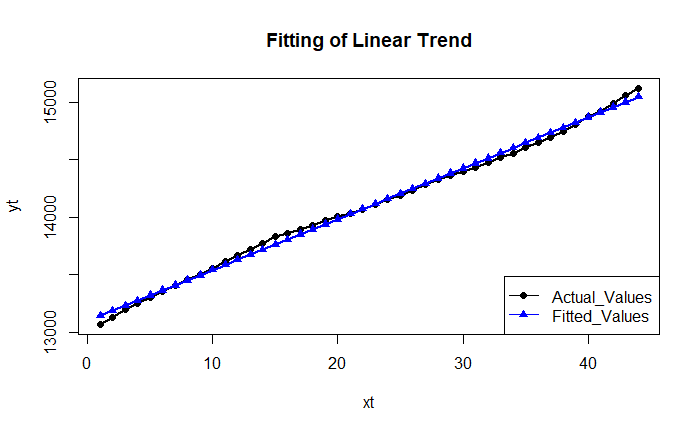

``` r
# Method - 2: By Considering the lm() function in R
```

``` r
# Model Building
lm(formula = yt ~ xt)
```

    Call:
    lm(formula = yt ~ xt)

    Coefficients:
    (Intercept)           xt  
        13098.6         44.2  

``` r
# Model Coefficients
lm(yt ~ xt)[['coefficients']]
```

    (Intercept)          xt 
    13098.62241    44.19941 

``` r
# Model Fitted Values
lm(yt ~ xt)[['fitted.values']]
```

           1        2        3        4        5        6        7        8 
    13142.82 13187.02 13231.22 13275.42 13319.62 13363.82 13408.02 13452.22 
           9       10       11       12       13       14       15       16 
    13496.42 13540.62 13584.82 13629.02 13673.21 13717.41 13761.61 13805.81 
          17       18       19       20       21       22       23       24 
    13850.01 13894.21 13938.41 13982.61 14026.81 14071.01 14115.21 14159.41 
          25       26       27       28       29       30       31       32 
    14203.61 14247.81 14292.01 14336.21 14380.41 14424.60 14468.80 14513.00 
          33       34       35       36       37       38       39       40 
    14557.20 14601.40 14645.60 14689.80 14734.00 14778.20 14822.40 14866.60 
          41       42       43       44 
    14910.80 14955.00 14999.20 15043.40 

LS0tDQp0aXRsZTogIlIgTm90ZWJvb2siDQpvdXRwdXQ6IGh0bWxfbm90ZWJvb2sNCi0tLQ0KDQpgYGB7cn0NCiMgICAgICAgICAgICAgICAgICAgVHJlbmQgTGluZSBFc3RpbWF0aW9uIG5vdGVib29rIC0gMSAtIExpbmVhciBUcmVuZA0KYGBgDQoNCnByb2JsZW06IFVpc25nIHRoZSAnYXVzdHJlcycgKHF1YXJ0ZXJseSB0cyBkYXRhKSBkYXRhIChmcm9tIGRhdGFzZXRzIGxpYnJhcnkpIG9mIFIsIGNvbmR1Y3QgdGhlIGZvbGxvd2luZyB0YXNrcyAtIA0KUmVtZW1iZXIgLSAgVGhlIGRhdGEgc3RhcnRzIGZyb20gMXN0IHF1YXJ0ZXIgb2YgMTk3NSBhbmQgZW5kcyBpbiA0dGggcXVhcnRlciBvZiAxOTg1DQoqIEZpdCBhIGxpbmVhciB0cmVuZCB0byB0aGUgZGF0YS4NCiogUHJvamVjdCB2YWx1ZXMgY29ycmVzcG9uZGluZyB0byB5ZWFyIDE5ODYNCiogUGxvdCBmaXR0ZWQgdmFsdWVzIHdpdGggQWN0dWFsIFZhbHVlcw0KDQpgYGB7cn0NCiMgSW5zdGFsbCBhbmQgTG9hZCByZXF1aXJlZCBwYWNrYWdlcw0KaW5zdGFsbC5wYWNrYWdlcygndGlkeXZlcnNlJykNCmxpYnJhcnkodGlkeXZlcnNlKQ0KbGlicmFyeShkYXRhc2V0cykNCmBgYA0KDQpgYGB7cn0NCiMgQ29uc2lkZXIgdGhlICdhdXN0cmVzJyBkYXRhIHNldA0KZGF0YSgnYXVzdHJlcycpDQpkYXRhLmF1cyA9IGF1c3RyZXMNCmRhdGEuYXVzDQpgYGANCmBgYHtyfQ0KIyBDaGVja2luZyB0aGUgdHlwZSBvZiB0aGUgZGF0YQ0KY2xhc3MoZGF0YS5hdXMpDQpgYGANCg0KYGBge3J9DQojIEV4dHJhY3RpbmcgTm8uIHJlc2lkZW50cyBmcm9tIDE5NzUgdG8gMTk4NQ0KeXQgPSB0cyhkYXRhLmF1cywgZnJlcXVlbmN5ID0gNCwgc3RhcnQgPSBjKDE5NzUsMSksIGVuZCA9IGMoMTk4NSw0KSkNCnl0DQoNCiMgTGVuZ3RoIG9mIGRlcGVuZGVudCB2YXJpYWJsZSB5dA0KbiA9IGxlbmd0aCh5dCkNCm4NCmBgYA0KYGBge3J9DQojIENyZWF0aW5nIHRoZSB0aW1lIGRhdGEgKHh0KSBhcyBpbmRlcGVuZGVudCB2YXJpYWJsZQ0KeHQgPSAxOm4NCnh0DQpgYGANCmBgYHtyfQ0KIyBNZXRob2QgLSAxOiBCeSBDb25zdHJ1Y3RpbmcgQSwgQyBhbmQgdGhlbiBDb21wdXRpbmcgQiBtYXRyaXgNCmBgYA0KDQoNCmBgYHtyfQ0KIyBFc3RpbWF0aW5nIHRoZSBjb2VmZmljaWVudHMgYl8wIGFuZCBiXzENCg0KIyBDb25zdHJ1Y3RpbmcgdGhlIG1hdHJpeCBBDQpBID0gbWF0cml4KGMobiwgc3VtKHh0KSwgc3VtKHh0KSwgc3VtKHh0XjIpKSwgbmNvbCA9IDIpDQpBDQoNCiMgQ29uc3RydWN0aW9uIG9mIHRoZSBtYXRyaXggQw0KQyA9IG1hdHJpeChjKHN1bSh5dCksIHN1bSh4dCp5dCkpLCBuY29sID0gMSkNCkMNCg0KIyBFc3RpbWF0aW5nIHRoZSBjb2VmZmljaWVudHMgdGhhdCBpcyBjb250YWluZWQgaW4gbWF0cml4IGZvcm0NCkIgPSBzb2x2ZShBKSUqJSBDDQpCDQpgYGANCmBgYHtyfQ0KIyBHZXR0aW5nIHRoZSBFc3RpbWF0ZWQgQ29lZmZpY2llbnRzDQppbnRlcmNlcHQgPSBCWzFdDQpzbG9wZSA9IEJbMl0NCmludGVyY2VwdDtzbG9wZQ0KYGBgDQpgYGB7cn0NCiMgQ29tcHV0aW5nIHRoZSBwcm9qZWN0ZWQgVmFsdWVzIG9mIHJlc2lkZW50IGluIDE5ODYNCiMgQ29ycmVzcG9uZGluZyB0aW1lIHdpbGwgYmUgNDUgdG8gNDgNCnl0XzE5ODYgPSBpbnRlcmNlcHQgKyBzbG9wZSooNDU6NDgpDQp5dF8xOTg2DQpgYGANCmBgYHtyfQ0KIyBHZXR0aW5nIHRoZSBGaWl0ZWQgdmFsdWVzIHVzaW5nIHRoZSBtb2RlbCBjb2VmZmljaWVudHMNCnl0LmZpdCA9IGludGVyY2VwdCArIHNsb3BlKnh0DQp5dC5maXQNCmBgYA0KYGBge3J9DQojIFBsb3R0aW5nIEFjdHVhbCB2YWx1ZXMgdmVyc3VzIGZpdHRlZCB2YWx1ZXMNCnBsb3QoeHQseXQsIHR5cGUgPSAnbycsIHBjaCA9MTYgLCBjb2wgPSAnYmxhY2snLCBsd2QgPSAyLCANCiAgICAgbWFpbiA9ICdGaXR0aW5nIG9mIExpbmVhciBUcmVuZCcpDQpsaW5lcyh4dCx5dC5maXQsIHR5cGUgPSAnbycsIHBjaCA9IDE3LCBjb2wgPSAnYmx1ZScsIGx3ZCA9IDIpDQpsZWdlbmQoJ2JvdHRvbXJpZ2h0JywgcGNoID0gYygxNiwxNyksIGx0eSA9IGMoMSwxKSwNCiAgICAgICBsZWdlbmQgPSBjKCdBY3R1YWxfVmFsdWVzJywgJ0ZpdHRlZF9WYWx1ZXMnKSwgY29sID0gYygnYmxhY2snLCAnYmx1ZScpKQ0KYGBgDQpgYGB7cn0NCiMgTWV0aG9kIC0gMjogQnkgQ29uc2lkZXJpbmcgdGhlIGxtKCkgZnVuY3Rpb24gaW4gUg0KYGBgDQoNCmBgYHtyfQ0KIyBNb2RlbCBCdWlsZGluZw0KbG0oZm9ybXVsYSA9IHl0IH4geHQpDQoNCiMgTW9kZWwgQ29lZmZpY2llbnRzDQpsbSh5dCB+IHh0KVtbJ2NvZWZmaWNpZW50cyddXQ0KDQojIE1vZGVsIEZpdHRlZCBWYWx1ZXMNCmxtKHl0IH4geHQpW1snZml0dGVkLnZhbHVlcyddXQ0KYGBgDQo=